In [1]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [2]:
# GENERATE 2D CLASSIFICATION DATASET
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [3]:
# SPLIT INTO TRAIN AND TEST
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [4]:
# DEFINE MODEL
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# PATIENT EARLY STOPPING
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [6]:
# FIT MODEL
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=400, verbose=0, callbacks=[es])

In [7]:
# EVALUATE THE MODEL
_, train_acc = model.evaluate(trainX, trainy, verbose=0) 
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.843


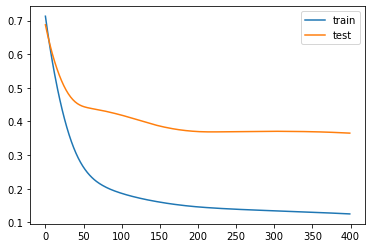

In [8]:
# PLOT TRAINING HISTORY
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
